In [1]:
import warnings
import numpy as np
import pandas as pd
from datar import tidyr
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows', None)

In [2]:
database = pd.read_csv("Houseprice.csv")
database

,Date,RegionName,AreaCode,AveragePrice
,<object>,<object>,<object>,<float64>
0,01/01/2005,Aberdeenshire,S12000034,101818.93310
1,01/02/2005,Aberdeenshire,S12000034,97626.00076
2,01/03/2005,Aberdeenshire,S12000034,94779.34241
3,01/04/2005,Aberdeenshire,S12000034,95847.70590
...,...,...,...,...
4,01/05/2005,Aberdeenshire,S12000034,101744.46620
86721,01/02/2022,Wyre Forest,E07000239,243056.07800
86722,01/01/2022,York,E06000014,302211.15430
86723,01/02/2022,York,E06000014,302940.34360


In [3]:
database_sep = tidyr.separate(database, "Date", into = ("day", "month", "year"), sep = "/")
database_drp = database_sep[:len(database_sep)-1].drop(["day"], axis=1)
database_drp

,RegionName,AreaCode,AveragePrice,month,year
,<object>,<object>,<float64>,<object>,<object>
0,Aberdeenshire,S12000034,101818.93310,01,2005
1,Aberdeenshire,S12000034,97626.00076,02,2005
2,Aberdeenshire,S12000034,94779.34241,03,2005
3,Aberdeenshire,S12000034,95847.70590,04,2005
...,...,...,...,...,...
4,Aberdeenshire,S12000034,101744.46620,05,2005
86720,Wyre Forest,E07000239,243744.41440,01,2022
86721,Wyre Forest,E07000239,243056.07800,02,2022
86722,York,E06000014,302211.15430,01,2022


In [4]:
database_filt = database_drp[database_drp["month"] == "01"]
database_filt

,RegionName,AreaCode,AveragePrice,month,year
,<object>,<object>,<float64>,<object>,<object>
0,Aberdeenshire,S12000034,101818.93310,01,2005
12,Adur,E07000223,182982.03850,01,2005
24,Allerdale,E07000026,114229.15550,01,2005
36,Amber Valley,E07000032,126505.25550,01,2005
...,...,...,...,...,...
48,Angus,S12000041,79909.06789,01,2005
86716,Wychavon,E07000238,324077.06150,01,2022
86718,Wyre,E07000128,179018.77930,01,2022
86720,Wyre Forest,E07000239,243744.41440,01,2022


## Clustering by Region

In [5]:
RegionName = []
for i in database_filt['RegionName'].unique():
    RegionName.append(i)
    
AreaCode = []
for i in database_filt['AreaCode'].unique():
    AreaCode.append(i)

AvgDifference = []
for i in RegionName:
    single = database_filt.loc[database_filt['RegionName'] == i]
    AveragePrice = single["AveragePrice"].tolist()
    diff = abs(np.diff(AveragePrice))
    AvgDifference.append(np.mean(diff))

database_result = pd.DataFrame({'RegionName':RegionName, 'AreaCode':AreaCode,  'AvgDifference':AvgDifference})
database_result

,RegionName,AreaCode,AvgDifference
,<object>,<object>,<float64>
0,Aberdeenshire,S12000034,9524.020459
1,Adur,E07000223,16899.219506
2,Allerdale,E07000026,7449.751500
3,Amber Valley,E07000032,7450.726000
...,...,...,...
4,Angus,S12000041,8792.890118
416,Wychavon,E07000238,10730.497000
417,Wyre,E07000128,6275.884988
418,Wyre Forest,E07000239,9145.510682


In [6]:
HighestTopTen = database_result.sort_values("AvgDifference",ascending=False, inplace=False).head(10)
HighestRegion = list(HighestTopTen["RegionName"].values)
HighestTopTen

,RegionName,AreaCode,AvgDifference
,<object>,<object>,<float64>
190,Kensington and Chelsea,E09000020,93982.857012
79,City of London,E09000001,69297.974388
83,City of Westminster,E09000033,66218.079594
53,Camden,E09000007,43400.140735
161,Hammersmith and Fulham,E09000013,37226.853624
285,Richmond upon Thames,E09000027,36952.373582
189,Islington,E09000019,35883.361729
128,Elmbridge,E07000207,33214.435188
37,Brent,E09000005,29454.286706


In [7]:
LowestTopTen = database_result.sort_values("AvgDifference",ascending=True, inplace=False).head(10)
LowestRegion = list(LowestTopTen["RegionName"].values)
LowestTopTen

,RegionName,AreaCode,AvgDifference
,<object>,<object>,<float64>
344,Stockton-on-Tees,E06000004,4496.414971
349,Sunderland,E08000024,4502.012682
90,County Durham,E06000047,4690.085781
250,North Lanarkshire,S12000050,4727.102822
27,Blackpool,E06000009,4945.527865
104,Doncaster,E08000017,5021.964465
245,North East,E12000001,5089.362412
57,Carlisle,E07000028,5126.871324
345,Stoke-on-Trent,E06000021,5212.815645


## Clustering by Year

### ·Anchor (UK average fluctuation [Except Top10] )

In [8]:
ExcRegion = HighestRegion+LowestRegion
database_excp = database_filt[~database_filt['RegionName'].isin(ExcRegion)]
database_excp

,RegionName,AreaCode,AveragePrice,month,year
,<object>,<object>,<float64>,<object>,<object>
0,Aberdeenshire,S12000034,101818.93310,01,2005
12,Adur,E07000223,182982.03850,01,2005
24,Allerdale,E07000026,114229.15550,01,2005
36,Amber Valley,E07000032,126505.25550,01,2005
...,...,...,...,...,...
48,Angus,S12000041,79909.06789,01,2005
86716,Wychavon,E07000238,324077.06150,01,2022
86718,Wyre,E07000128,179018.77930,01,2022
86720,Wyre Forest,E07000239,243744.41440,01,2022


In [9]:
database_rst = pd.DataFrame(columns=['RegionName','AveragePrice','year'])
database_anni = pd.DataFrame(columns=['RegionName','AveragePrice','year'])

RegionName = []
for i in database_excp['RegionName'].unique():
    RegionName.append(i)

Year = []
for i in database_excp['year'].unique():
    Year.append(i)

for i in RegionName:
    single = database_filt.loc[database_filt['RegionName'] == i]
    AveragePrice = single["AveragePrice"].tolist()
    for j in range(len(AveragePrice)):
        database_rst = database_rst.append(pd.DataFrame({'RegionName':[i],'AveragePrice':AveragePrice[j],'year':Year[j]}),ignore_index=True)

for i in Year:
    single = database_rst.loc[database_rst['year'] == i]
    AveragePrice = np.mean(single["AveragePrice"].tolist())
    database_anni = database_anni.append(pd.DataFrame({'RegionName':["UK_Avg"],'AveragePrice':[AveragePrice],'year':[i]}),ignore_index=True)        
        
database_anni

,RegionName,AveragePrice,year
,<object>,<float64>,<object>
0,UK_Avg,158551.226651,2005
1,UK_Avg,165165.924004,2006
2,UK_Avg,181392.767329,2007
3,UK_Avg,193675.935988,2008
4,UK_Avg,165478.427949,2009
5,UK_Avg,173547.867386,2010
6,UK_Avg,175159.627456,2011
7,UK_Avg,173891.241884,2012
8,UK_Avg,176270.755164,2013


### ·Outlier —— Edinburgh

In [10]:
# pd.set_option('display.max_rows', None)
Edb_row_database = database_filt[database_filt["RegionName"]=="City of Edinburgh"].reset_index()
Edb_col_database = Edb_row_database[["RegionName","AveragePrice","year"]]
Edb_database = Edb_col_database
Edb_database

,RegionName,AveragePrice,year
,<object>,<float64>,<object>
0,City of Edinburgh,162810.3338,2005
1,City of Edinburgh,174922.7950,2006
2,City of Edinburgh,198143.3505,2007
3,City of Edinburgh,221472.5419,2008
4,City of Edinburgh,192135.1275,2009
5,City of Edinburgh,211528.1962,2010
6,City of Edinburgh,211467.7286,2011
7,City of Edinburgh,199178.1093,2012
8,City of Edinburgh,192285.9733,2013


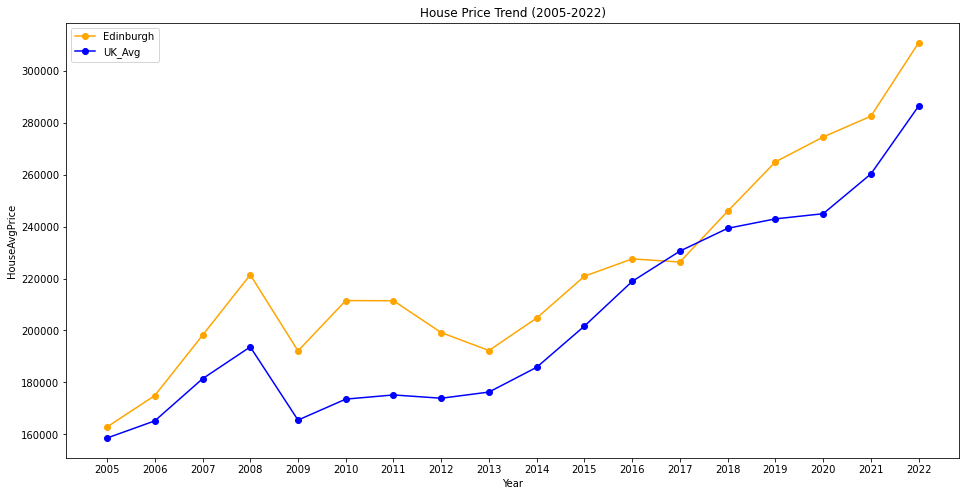

In [11]:
plt.figure(figsize=[16,8])
plt.title("House Price Trend (2005-2022)")
plt.xlabel("Year")
plt.ylabel("HouseAvgPrice")
plt.plot(Edb_database.year,Edb_database.AveragePrice,linestyle="-",marker='o',color="orange",label='Edinburgh')
plt.plot(database_anni.year,database_anni.AveragePrice,linestyle="-",marker='o',color="blue",label='UK_Avg')
plt.legend()
plt.show()

According to a comparative analysis of house price trends in British cities and Edinburgh, it can be found that there is no significant difference in house price trends in Edinburgh and the United Kingdom. However Edinburgh has an higher amplitude of house price change than other cities. Accoding to the Statistic of Deutsche Bank, one of the reasons why Edinburgh, as a city that is not in an area with high house price volatility, has a higher amplitude, is the quality of life.

In [12]:
QoL = pd.read_csv("life_index.csv")
QoL_Edb = QoL[["City","Year","Quality_of_Life_Index"]].loc[QoL["City"].str.contains("Edinburgh")]
QoL

,Year,City,Quality_of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Cost_of_Living_Index,Property_Price_to_Income_Ratio,Traffic_Commute_Time_Index,Pollution_Index,Climate_Index,Rank
,<int64>,<object>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<float64>,<object>,<int64>
0,2015,"Zurich, Switzerland",218.48,133.91,80.34,71.35,141.06,8.07,26.44,18.79,-,1
1,2015,"Frankfurt, Germany",210.97,139.55,70.04,63.10,83.53,5.76,27.17,35.85,-,2
2,2015,"Munich, Germany",196.87,99.64,85.36,90.59,84.16,13.09,24.50,21.82,-,3
3,2015,"Edinburgh, United Kingdom",195.10,96.34,71.96,68.19,91.74,5.62,21.43,14.01,-,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2015,"Trondheim, Norway",192.19,93.45,81.69,86.24,119.93,7.65,19.14,21.80,-,5
467,2021,"Skopje, North Macedonia",102.57,32.82,56.53,56.35,37.41,13.46,28.60,82.92,76.3,86
468,2021,"Dnipro, Ukraine",96.10,31.80,46.63,51.29,29.12,9.64,32.44,82.27,69.52,87
469,2021,"Tirana, Albania",90.85,27.43,61.08,48.78,42.12,16.21,39.93,87.89,86.43,88


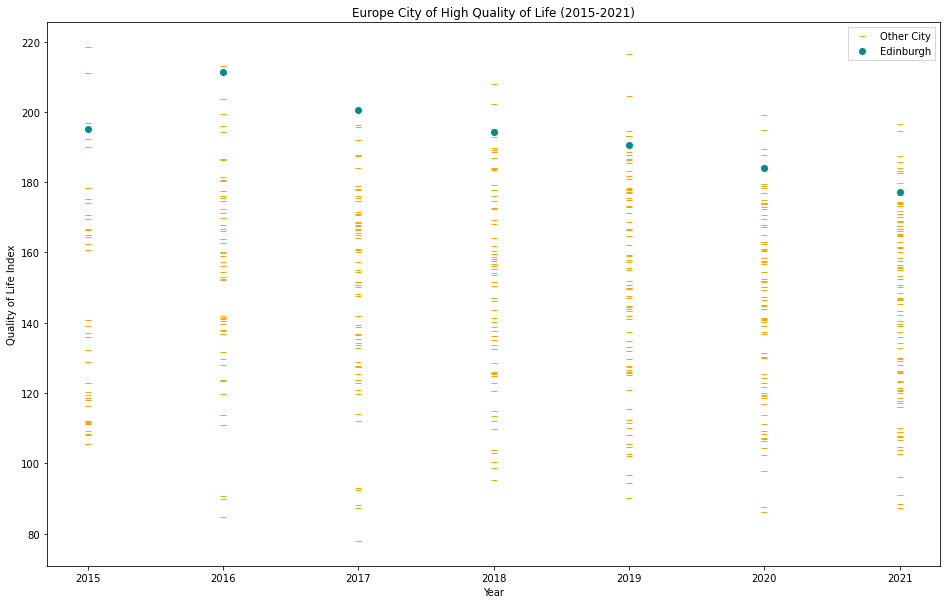

In [13]:
plt.figure(figsize=[16,10])
plt.title("Europe City of High Quality of Life (2015-2021)")
plt.xlabel("Year")
plt.ylabel("Quality of Life Index")
plt.plot(QoL.Year,QoL.Quality_of_Life_Index,linestyle=" ",marker='_',color="orange",label='Other City')
plt.plot(QoL_Edb.Year,QoL_Edb.Quality_of_Life_Index,linestyle=" ",marker='o',color="darkcyan",label='Edinburgh')
plt.legend()
plt.show()

Find the UK cities in the rank then bring them back to previous dataset to see how their house prices have changed

In [14]:
QoL_filt = QoL[["City","Year","Quality_of_Life_Index"]].loc[QoL["City"].str.contains("United Kingdom")]
UKCC = np.unique(QoL_filt["City"].tolist())
UKC = []
for i in UKCC:
    n = i.split(",",1)[0]
    UKC.append(n)

print(UKC)

['Belfast', 'Birmingham', 'Bristol', 'Cambridge', 'Edinburgh', 'Glasgow', 'Leeds', 'Liverpool', 'London', 'Manchester']


In [15]:
database_result

,RegionName,AreaCode,AvgDifference
,<object>,<object>,<float64>
0,Aberdeenshire,S12000034,9524.020459
1,Adur,E07000223,16899.219506
2,Allerdale,E07000026,7449.751500
3,Amber Valley,E07000032,7450.726000
...,...,...,...
4,Angus,S12000041,8792.890118
416,Wychavon,E07000238,10730.497000
417,Wyre,E07000128,6275.884988
418,Wyre Forest,E07000239,9145.510682


In [16]:
RankedCity = pd.DataFrame()
for i in UKC:
    df = database_result.loc[database_result["RegionName"].str.contains(i)]
    RankedCity = pd.concat([RankedCity,df])

RankedCity

,RegionName,AreaCode,AvgDifference
,<object>,<object>,<float64>
22,Belfast,N09000003,14210.247456
24,Birmingham,E08000025,7514.459382
73,City of Bristol,E06000023,14607.529859
51,Cambridge,E07000008,22081.589524
52,Cambridgeshire,E10000003,13554.684618
111,East Cambridgeshire,E07000009,13261.432035
315,South Cambridgeshire,E07000012,20301.858053
76,City of Edinburgh,S12000036,14567.893994
77,City of Glasgow,S12000049,7957.615635


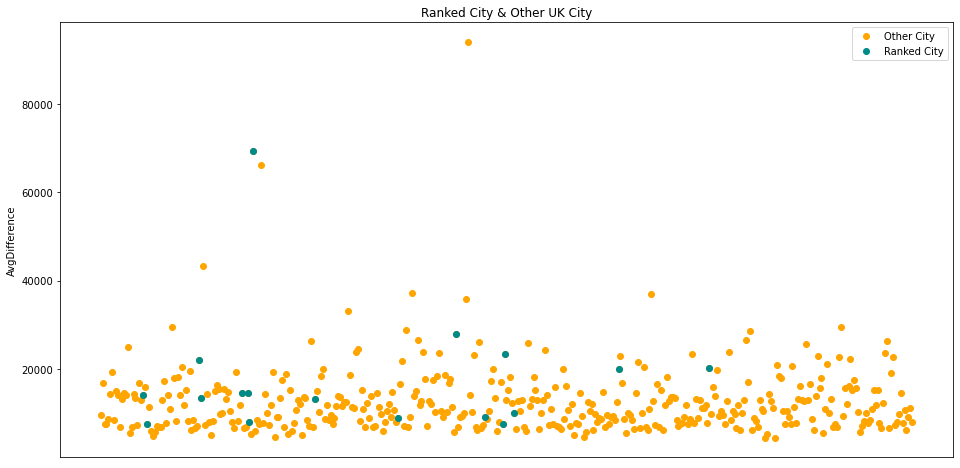

In [17]:
plt.figure(figsize=[16,8])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.title("Ranked City & Other UK City")
plt.xlabel("Region")
plt.ylabel("AvgDifference")
plt.plot(database_result.RegionName,database_result.AvgDifference,linestyle=" ",marker='o',color="orange",label='Other City')
plt.plot(RankedCity.RegionName,RankedCity.AvgDifference,linestyle=" ",marker='o',color="darkcyan",label='Ranked City')
plt.legend()
plt.show()

It can be concluded from the graph that quality of life is not a strong correlative factor in determining house prices, there are other stronger factors affecting house prices